## 1標本のt検定

母集団から無作為抽出された1つの標本にてついて、その母集団の平均値に対して標本平均が等しいかどうか？を検定する。

In [2]:
import os
import sys
sys.path.append("../../scripts")
import warnings
warnings.simplefilter('ignore')

# Libraries
import pandas as pd
import numpy as np
np.random.seed(111)

# scipy
from scipy import stats
# graph
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(111)

# scripts
import utils as u

In [3]:
# graph setting
u.graph_setting()

### データセット

In [4]:
# scikit-learnに用意されている、アヤメのデータセットを使う
from sklearn.datasets import load_iris
iris = load_iris()

# irisのデータセットは、辞書型で格納されているので、扱いやすいようにpandasのデータフレームに変換する。
# 各特徴データ
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# ラベル, 種類のデータ。各数値ラベルを名前に置き換えて加える。
df["target"] = [iris.target_names[t] for t in iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# データセットの準備
# 'setosa'のデータを20サンプル抽出
df_setosa = df[df["target"]=="setosa"].sample(10, random_state=111).reset_index(drop=True)

# sampling values
values = df_setosa["sepal length (cm)"].values
values

array([5.5, 4.8, 5.4, 4.9, 5.4, 4.7, 5.1, 5.1, 5.1, 5. ])

### 問題設定

- ある花畑での'setosa'の'sepal length(cm)'の平均は、5cmであるとされている。<br>
- 取得したデータはある1区画のデータとし、その内10本無作為抽出したものとする。<br>
- 全体の平均値に対して差があるといえるか？を統計的に検定する。<br>

帰無仮説：'setosa'の'sepal length'は5cmで全体平均と変わらない。<br>
対立仮説：5cmと異なる。<br>
優位水準α=5%(両側)とし判断する。<br>

### データをグラフ確認

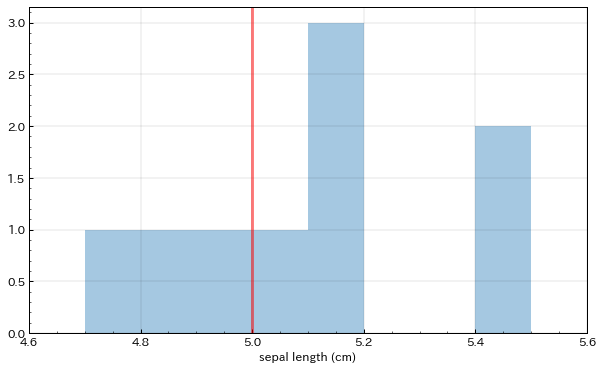

In [12]:
# distplot
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(values, bins=np.arange(np.min(values)-0.1, np.max(values)+0.1, 0.1), kde=False, ax=ax)
ax.set_xlabel("sepal length (cm)")
ax.set_xlim([np.min(values)-0.1, np.max(values)+0.1])
ax.axvline(x=5.0, ymin=0, ymax=5, color="red", lw=3, linestyle="-", alpha=0.5)

### (1)統計量を求めながらt値を計算する

In [7]:
# Function
def calc_tvalue(values:list, mean:float)->float:
    '''
    tを計算する

    Args
        values (list) : 計算対象の1次元リスト。numpy.arrayやpandas.Seriesも可
        mean (float) : 母集団の平均値

    Return
        t : 計算されたt値を返す。
    '''

    # calc mean
    m = np.mean(values)
    # calc std, 不偏標本標準偏差を使う
    s = np.std(values, ddof=1)
    # dataset count
    n = len(values)

    # calc standard error
    se = s / np.sqrt(n)

    # t value
    t = (m-mean) / se

    return t

In [8]:
# calculate t value
t = calc_tvalue(values=values, mean=5.0)
t

1.1858541225631483

In [9]:
# 両側信頼係数のt値を求める。

# 自由度
d = len(values) -1
# 片側優位水準
alpha = 0.025

# scipy.statsを使って計算する。
t_thre = stats.t.ppf(1 - alpha/2, d)
print(t_thre)

2.685010846004532


### 判定
- t値は1.185で、優位水準5%の片側2.5%点の値2.433より小さい。よって帰無仮説は棄却されない。<br>
-> 差は無い

### (2) scipy.stats.ttest_1samp()関数を使って計算する。

In [10]:
t_value, p_value = stats.ttest_1samp(a=values, popmean=5.0, alternative="two-sided", )
t_value, p_value

(1.1858541225631483, 0.2660426577404661)

### 判定
- p値は0.266と優位水準5%より大きい。よって帰無仮説は棄却されない。<br>
-> 差は無い

### グラフ確認
t分布表を見て、値の関係をイメージする。

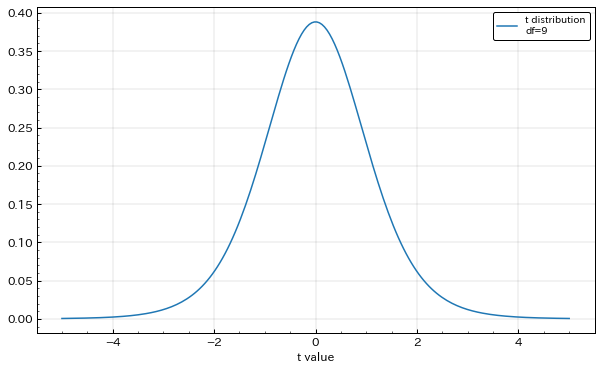

In [14]:
# t分布サンプリング
t_range = np.linspace(-5,5,200)
t_value_ar = []
for i in t_range:
    t_value_ar.append(stats.t.pdf(x=i, df=len(values)-1))

# plot
plt.figure(figsize=(10,6))
plt.plot(t_range, t_value_ar, label="t distribution\ndf={}".format(len(values)-1))
plt.xlabel("t value")
plt.legend()